# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Loading success")


Loading MNIST dataset...
Loading success


## Part 2: Implement SVD for Dimensionality Reduction

In [18]:
def apply_svd_custom(X_train, X_test, n_components, return_eigenvectors=False):
    # Calculate the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train)
    
    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues in descending order and get corresponding indices
    sorted_indices = np.argsort(-eigenvalues)
    
    # Select the top n_components eigenvectors
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    
    # Project the data onto the new subspace
    X_train_svd = np.dot(X_train, top_eigenvectors)
    X_test_svd = np.dot(X_test, top_eigenvectors)
    
    return X_train_svd, X_test_svd


## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [12]:
svd_components = [500, 300, 100, 50, 10]   # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 500 components...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 173.5475 seconds
Applying custom SVD with 300 components...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 77.8133 seconds
Applying custom SVD with 100 components...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 15.6703 seconds
Applying custom SVD with 50 components...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 3.7701 seconds
Applying custom SVD with 10 components...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 0.2398 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


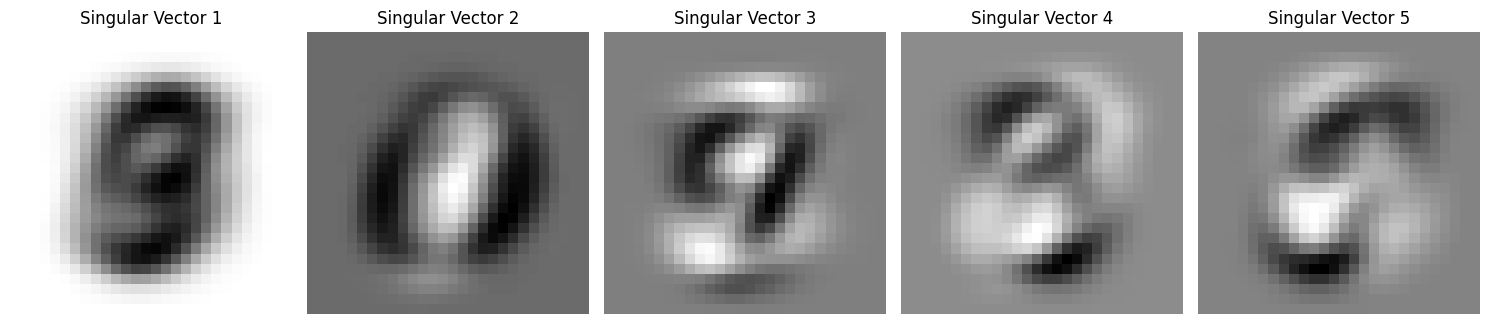

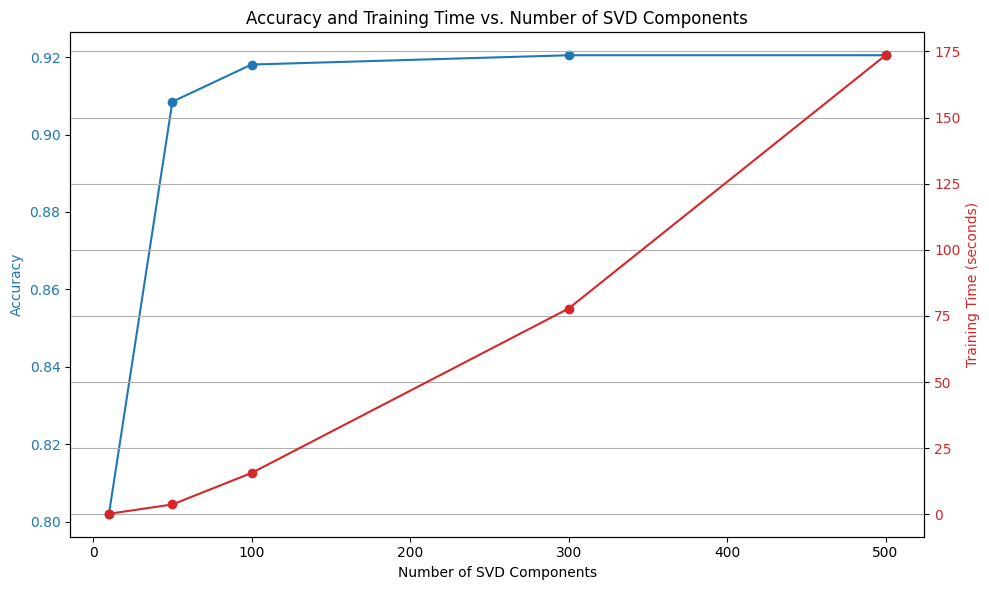

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_singular_vectors(U, n_vectors=5):
    """
    Visualize the top n singular vectors.
    
    Parameters:
        U: array, shape (n_features, n_components)
            Left singular vectors obtained from SVD.
        n_vectors: int
            Number of singular vectors to visualize.
    """
    plt.figure(figsize=(15, 5))
    for i in range(n_vectors):
        singular_vector = U[:, i]
        singular_image = singular_vector.reshape(28, 28)  # Assuming original images are 28x28

        plt.subplot(1, n_vectors, i + 1)
        plt.imshow(singular_image, cmap='gray')
        plt.title(f'Singular Vector {i + 1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Extract the top 5 singular vectors for visualization
X_train_svd, X_test_svd, top_5_singular_vectors = apply_svd_custom(X_train, X_test, 5, return_eigenvectors=True)

# Visualize the top 5 singular vectors using the corrected function call
visualize_singular_vectors(top_5_singular_vectors)

import matplotlib.pyplot as plt

# Data from the training logs
results = [
    (500, 0.9205, 173.5475),
    (300, 0.9205, 77.8133),
    (100, 0.9181, 15.6703),
    (50, 0.9085, 3.7701),
    (10, 0.8020, 0.2398)
]

# Extract values for plotting
n_components, accuracies, training_times = zip(*results)

# Plot Accuracy and Training Time as a Function of the Number of SVD Components
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(n_components, accuracies, marker='o', linestyle='-', color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot training time
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
ax2.plot(n_components, training_times, marker='o', linestyle='-', color='tab:red', label='Training Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title and grid
plt.title('Accuracy and Training Time vs. Number of SVD Components')
fig.tight_layout()
plt.grid(True)
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: It looks like there is a sweet spot between having a not-so-bad training time, but remaining mostly accurate to a point. There is a large variance in the accuracy in the sub-100 SVD component range, as at this range, more components drastically increase the accuracy. This tapers off, however, and we see a mostly optimal solution at 300 SVD components, since we get the max relative possible accuracy with only around a minute runtime. At 500 components, we get a much longer run time for almost no extra benefit. This suggests that the number of SVD components follows an almost logarithmic model when you compare it to how useful the number of components are. You get a lot of benefit with 100 components, but not that much more from 300 or even 500. 